# Daily COVID-19 Case Increases By State and Political Affiliation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
from datetime import datetime

## Retrieve the Data

In [2]:
# The COVID Tracking Project API URL.
url = 'https://api.covidtracking.com/v1/states/current.csv'
# Ignore the SSL error if one arises.
ssl._create_default_https_context = ssl._create_unverified_context
# Load the data into a DataFrame.
df = pd.read_csv(url)

## Parsing the Data

In [3]:
# Get the current date.
date = datetime.strptime(df['date'].unique()[0].astype(str), '%Y%m%d').strftime('%d-%b-%Y')
# Retrieve the state names and case number.
cases = df[['state','positiveIncrease']]

In [4]:
# Remove non-states.
cases = df.drop(df[df['state'].isin(['AS', 'DC', 'GU', 'MP', 'PR', 'VI'])].index)[['state', 'positiveIncrease']]
# Sort the states by case number.
cases.sort_values(by='positiveIncrease', ascending=False, inplace=True)

In [5]:
# Assign each state a political affiliation
# based on results from previous elections.
states = {'AK': 'red',
'AL': 'red',
'AR': 'red',
'AZ': 'red',
'CA': 'blue',
'CO': 'blue',
'CT': 'blue',
'DE': 'blue',
'FL': 'red',
'GA': 'red',
'HI': 'blue',
'IA': 'blue',
'ID': 'red',
'IL': 'blue',
'IN': 'red',
'KS': 'red',
'KY': 'red',
'LA': 'red',
'MA': 'blue',
'MD': 'blue',
'ME': 'blue',
'MI': 'blue',
'MN': 'blue',
'MO': 'red',
'MS': 'red',
'MT': 'red',
'NC': 'red',
'ND': 'red',
'NE': 'red',
'NH': 'blue',
'NJ': 'red',
'NM': 'blue',
'NV': 'blue',
'NY': 'blue',
'OH': 'red',
'OK': 'red',
'OR': 'blue',
'PA': 'blue',
'RI': 'blue',
'SC': 'red',
'SD': 'red',
'TN': 'red',
'TX': 'red',
'UT': 'red',
'VA': 'red',
'VT': 'blue',
'WA': 'blue',
'WI': 'red',
'WV': 'red',
'WY': 'red'}

## Plotting the Data

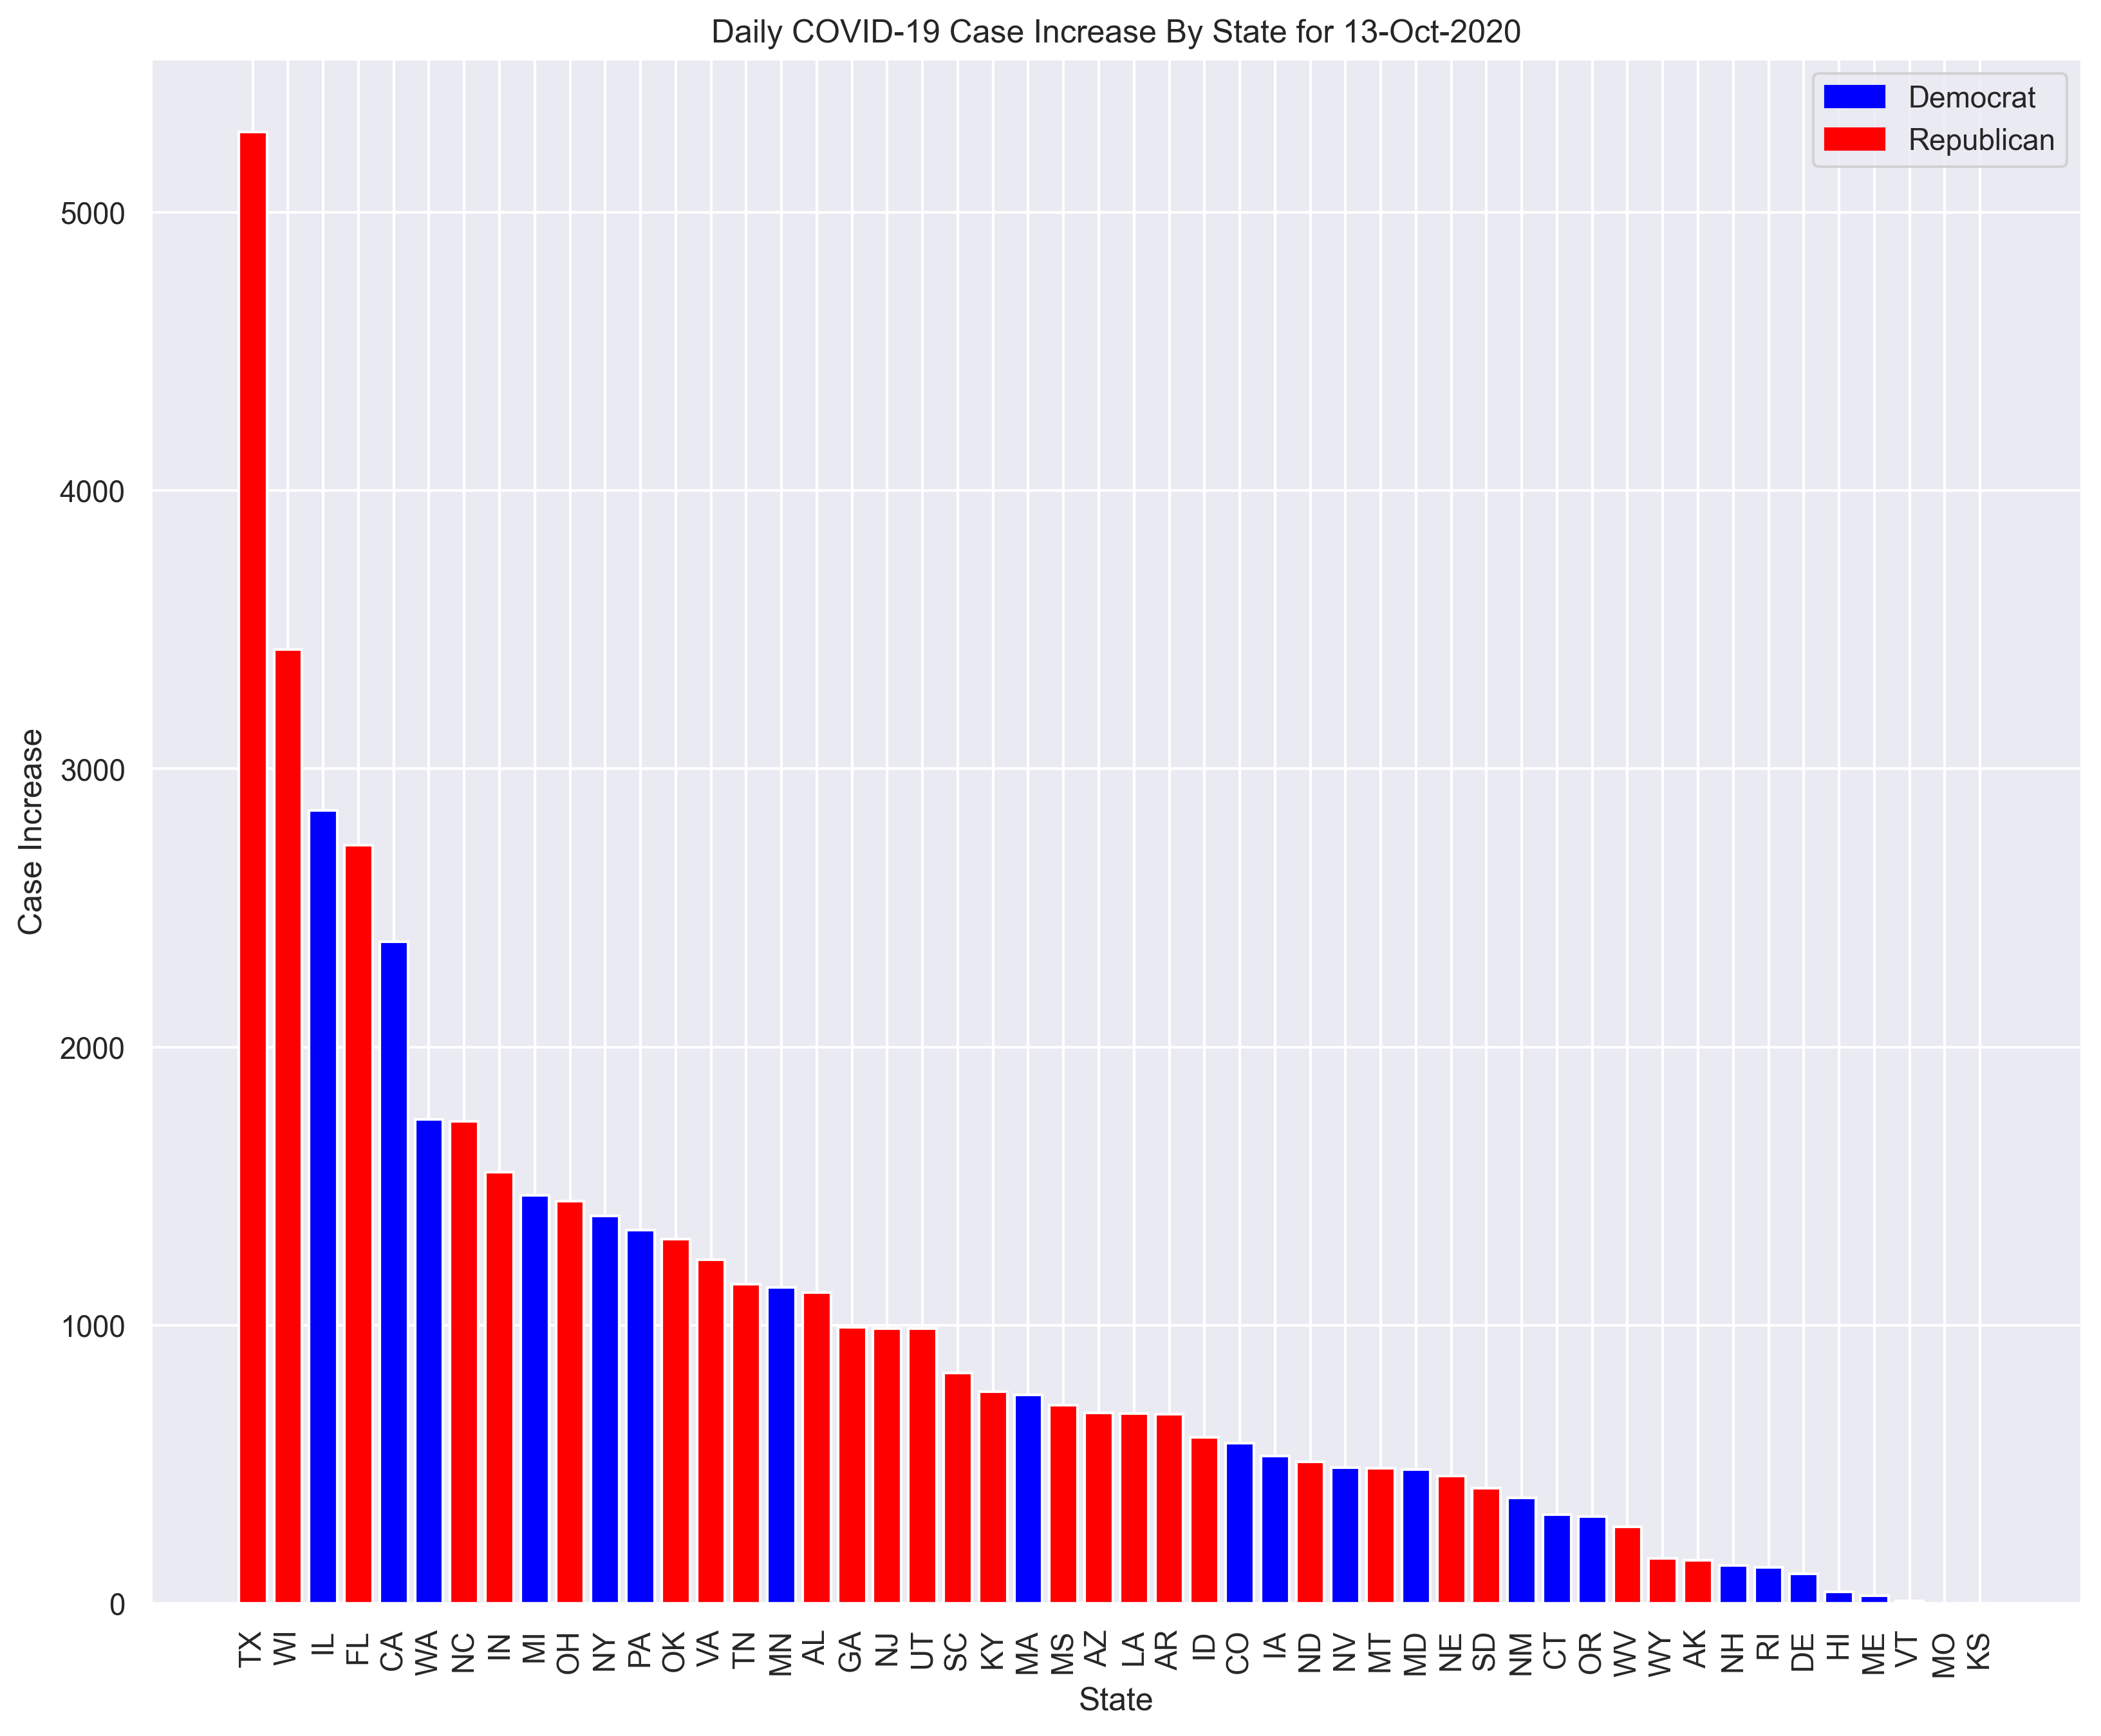

In [6]:
# Initialize seaborn.
sns.set_theme()
# Create a figure.
fig = plt.figure(figsize=(10,8), dpi=300)
# Create the axes.
axes = fig.add_axes([0, 0, 1, 1])
# Plot the data.
for row in cases.iterrows():
    state = row[1][0]
    case_increase = row[1][1]
    plt.bar(x=state, height=case_increase, color=states[state])
    
# Configure the x-ticks.
plt.xticks(np.arange(len(cases['state'])), cases['state'], rotation=90)

# Add the title.
plt.title(f'Daily COVID-19 Case Increase By State for {date}')

# Add axis labels.
plt.xlabel('State')
plt.ylabel('Case Increase')

# Add a legend.
legend = plt.legend(['Democrat', 'Republican'])
legend.legendHandles[0].set_color('blue')
legend.legendHandles[1].set_color('red')

# Show the plot.
plt.show()

    # Save the figure. 
    fig.savefig('example.png', bbox_inches='tight')